<a href="https://colab.research.google.com/github/Sgiriarun/ML-Implementation/blob/main/Implementation_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# IMPLEMENTATION PIPE-LINE OF MACHINE LEARNING MODEL
---



[Open this notebook in Google Colab![Google Colab](https://colab.research.google.com/img/colab_favicon.ico)](https://colab.research.google.com/drive/1ssHX_CblOTO_V9LR3tEe3uzV2KhDoHHS?usp=sharing)

### OBJECTIVE: ###
After completing this lab you will be able to:

* Develop a classification model

In this lab exercise, you will learn a popular machine learning algorithm (Decision Tree, Random forest and K-means clustering), Decision Trees. we will use this algorithm to build a model from the open source dataset, and their response to predict the Diabetes Progressed or Not (classification).


* By using sklearn Diabetes dataset exploring the **relationships between baseline variables and disease progression**, so **we develop the predictive models** that contribute to the **advancement of diabetes** treatment and patient care.

* **patients with disease progression above a certain value are classified as having a "high risk" (1), while those below are classified as "low risk" (0)**.

Then you will use the following implementation steps to predict the class of a iris dataset.


# Table of Contents

- [About the Dataset](#about-the-dataset)
- [Downloading the Data](#downloading-the-data)
- [Pre-processing](#pre-processing)
- [Setting up the Decision Tree](#setting-up-the-decision-tree)
- [Modeling](#modeling)
- [Prediction](#prediction)
- [Evaluation](#evaluation)
- [Visualization](#visualization)
- [Save Model](#save-model)
- [Deployment](#deployment)




---
## Import the Following Libraries:
* numpy : **To make Mathematical array of loaded data**
* pandas : **Used for data manipulation and analysis.**
* Classifier from sklearn.tree : **Model selection api**
* matplotlib.pyplot: A **plotting library** for visualizing data.
* sklearn.datasets: Contains **utilities to load sample datasets** (like Iris).
* sklearn.cluster: Contains the KMeans class for clustering algorithms.
* sklearn.preprocessing: Contains tools for **preprocessing data, like scaling**.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

##About the dataset

The **scikit-learn Diabetes Dataset**consists of ten baseline variables, such as age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements, obtained for 442 diabetes patients. The target variable is a quantitative measure of disease progression one year after baseline.

Characteristics of Sklearn Diabetes Dataset

* **Number of Instances**: 442
* **Number of Attributes**: The first 10 columns are numeric predictive values.
* **Target**: Column 11 represents a quantitative measure of disease progression one year after baseline.


The Sklearn Diabetes Dataset include **following attributes**:

* **age**: Age in years
* **sex**: Gender of the patient
* **bmi**: Body mass index
* **bp**: Average blood pressure
* **s1**: Total serum cholesterol (tc)
* **s2**: Low-density lipoproteins (ldl)
* **s3**: High-density lipoproteins (hdl)
* **s4**: Total cholesterol / HDL (tch)
* **s5**: Possibly log of serum triglycerides level (ltg)
* **s6**: Blood sugar level (glu)

* **patients with disease progression above a certain value are classified as having a "high risk" (1), while those below are classified as "low risk" (0)**.


##Downloading the Data

* We will use the load_diabetes() function from the **sklearn.datasets() module** to access it directly **via the API**. This approach simplifies the process and eliminates the need for manual downloads.
* By importing this dataset, we can load it with pandas to do operation. And segregate the input(X), and labels(Y).

In [2]:
# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Convert the target into a binary classification problem
# We'll classify as 1 (high) if the value is above the median, otherwise 0 (low)
y_bin = np.where(y < np.median(y), 0, 1)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y_bin
print(df.head())



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646       1  
1 -0.039493 -0.068332 -0.092204       0  
2 -0.002592  0.002861 -0.025930       1  
3  0.034309  0.022688 -0.009362       1  
4 -0.002592 -0.031988 -0.046641       0  


after downloading the dataset, read with pandas, declare the following variables:
- X as the Feature Matrix (data of dataset)
- y as the response vector (target)
- The train_test_split will need the parameters: **X, y, test_size=0, and random_state=42**.
- Now train_test_split will return 4 different parameters. We will name them: **X_train, X_test, y_train, y_test**


In [3]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

## Preprocessing

- **Handling Missing Values**: Techniques like imputation or removal ensure the dataset is comprehensive, avoiding biased predictions.

- **Feature Scaling**: Normalization or standardization helps all features contribute equally, improving algorithm performance.



In [4]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



##Setting up the Decision Tree
- We will be using train/test split on our decision tree. its done with module **from sklearn.model_selection import train_test_split**.



- The **X and y are the arrays** required before the split, **the test_size represents the ratio of the testing dataset**, and the **random_state ensures that we obtain the same splits**.

In [5]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)


##HYPERPARAMER TUNNING:
Max Depth:

    What it is: This parameter limits the maximum depth of the tree. Setting this hyperparameter helps control overfitting.
    Importance: A deeper tree can model complex relationships but is more prone to overfitting. Limiting the depth can help the model generalize better to unseen data.

Min Samples Split:

    What it is: This is the minimum number of samples required to split an internal node. It can be an integer or a float (representing a percentage).
    Importance: This parameter helps prevent the model from learning overly specific patterns by requiring a minimum number of observations before making a split, thereby avoiding overfitting.

Min Samples Leaf:

    What it is: This parameter sets the minimum number of samples that must be present in a leaf node.
    Importance: Increasing this value can smooth the model and reduce overfitting by ensuring that leaf nodes contain a minimum number of samples, which helps in creating a more generalized model.

In [6]:
# Define hyperparameters for tuning
param_grid = {
    'criterion': [ 'entropy'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [10],
    'min_samples_leaf': [1, 2, 4, 6]
}

##Modeling
We will first create an instance of the **DecisionTreeClassifier** called **a**.
Inside of the classifier, specify **criterion="entropy"** so we can see the **information gain** of each node.

- We can use criterion as **entropy , gini or information gain** to evalate the potential splits.

- The split maximizes the reduction in impurity or maximizes the information gain is selected.

Next, we will fit the data with the training feature matrix X_train and training response vector y_train

In [7]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


 ## Prediction:

 Let's make some predictions on the testing dataset and store it into a variable called y_pred.

In [8]:
# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

##Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [9]:
# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
 [[33 16]
 [ 8 32]]
Accuracy: 0.7303370786516854
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        49
           1       0.67      0.80      0.73        40

    accuracy                           0.73        89
   macro avg       0.74      0.74      0.73        89
weighted avg       0.74      0.73      0.73        89



##visualization:
Let's visualize the tree and interpret the model functioning.

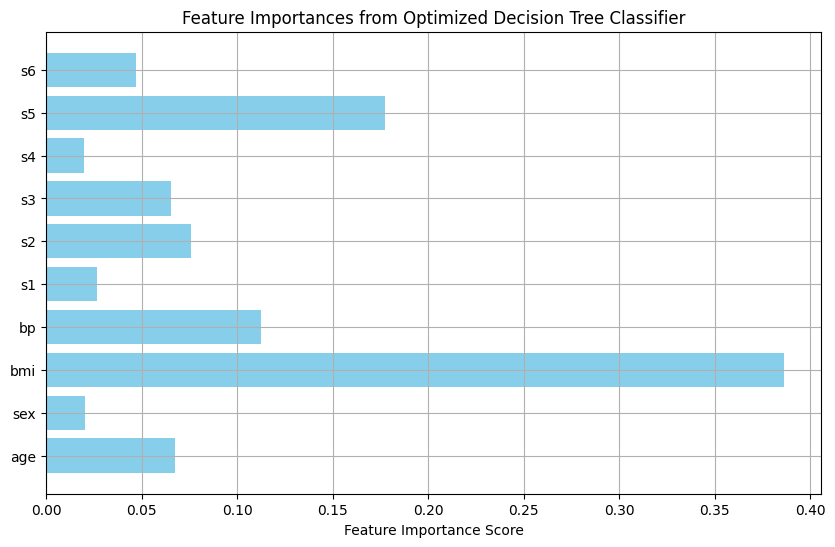

In [10]:
# Feature Importance
feature_importances = best_model.feature_importances_
feature_names = data.feature_names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from Optimized Decision Tree Classifier')
plt.grid()
plt.show()

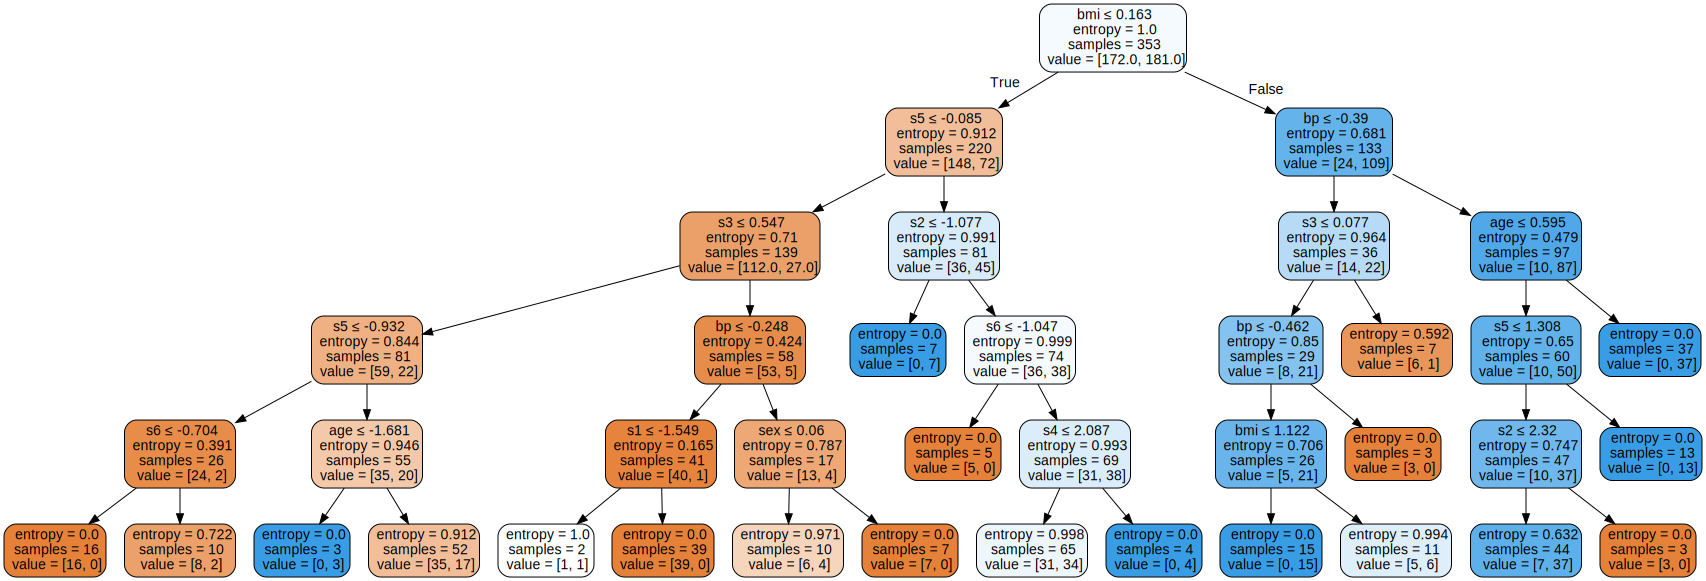

In [11]:
# Visualize the Decision Tree (optional)
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=data.feature_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_diabetes_optimized")  # Save the tree as a file
graph  # Display the tree


---

FOR RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



In [13]:
# Evaluation metrics for Random Forest

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
 [[38 11]
 [12 28]]
Accuracy: 0.7415730337078652
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        49
           1       0.72      0.70      0.71        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



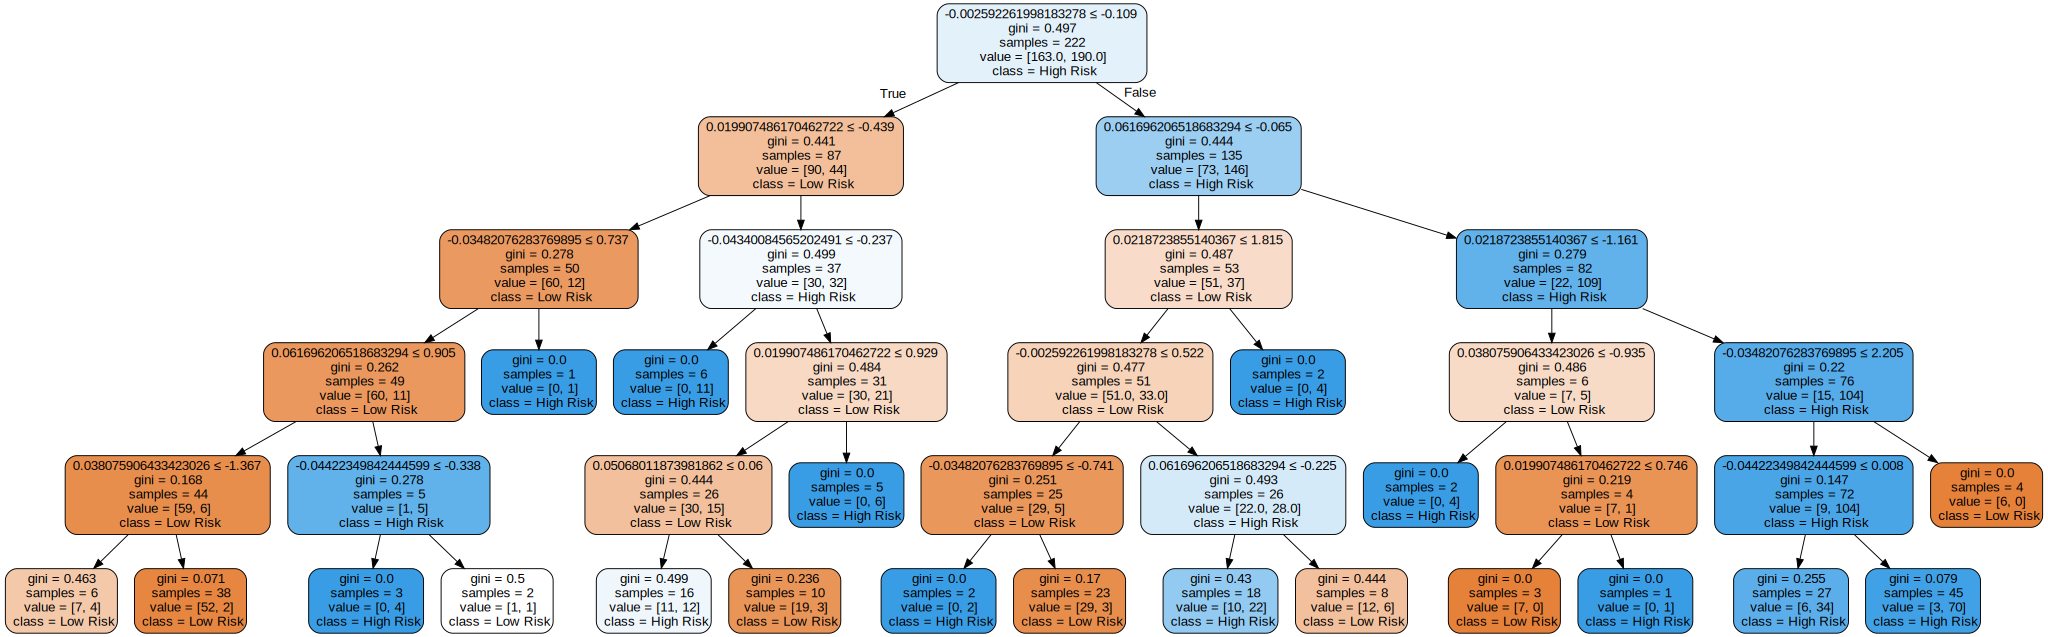

In [15]:
# Visualize one of the decision trees in the Random Forest
# Exporting the first tree for visualization
dot_data = export_graphviz(model.estimators_[0], out_file=None,
                           feature_names=X[0],
                           class_names=['Low Risk', 'High Risk'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Save the tree as a file
graph  # Display the tree


Feature importance score is calcualted based on how much each feature contributes to reducing impurity (entropy, Gini impurity) across all the nodes where feature is used.

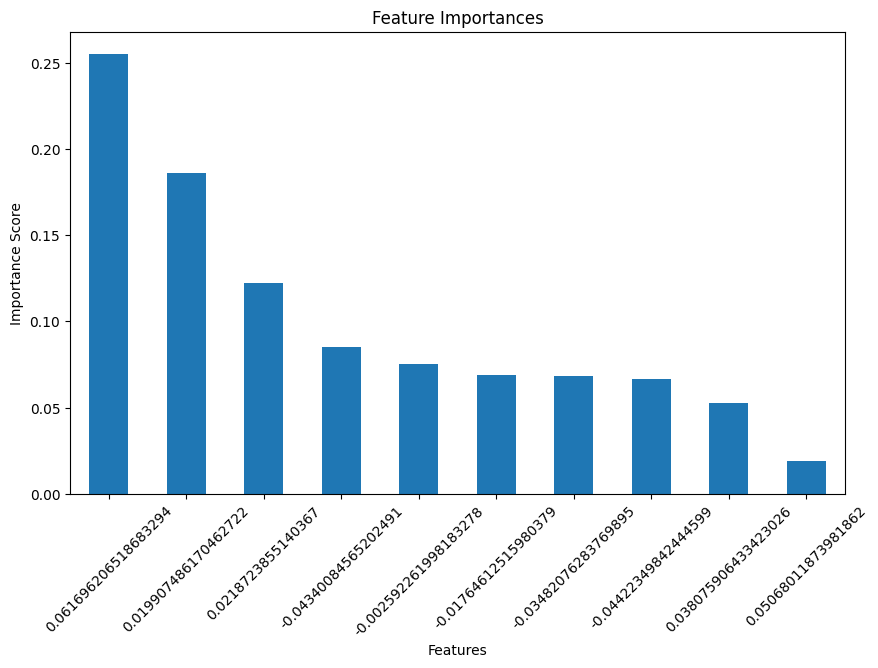

In [17]:
# Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X[0]).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


----
k-MEANS CLUSTERING

k-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

Some real-world applications of k-means include:
-    customer segmentation,
-    pattern recognition, and,
-    data compression.

so we do the custom customer_segmentation dataset classification without labels data.


In [18]:
!wget -q -O 'customer_segmentation.csv' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv
print('Data downloaded!')


Data downloaded!


K-means Clustering:

- KMeans(n_clusters=3, random_state=42): Initializes the K-means algorithm with **3 clusters** (since we know there are three species of iris). **random_state** is set for reproducibility of results.

- kmeans.fit(X_scaled): Fits the K-means model to the standardized data, where the algorithm iteratively assigns data points to the nearest cluster center and updates the centers.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
# Load the dataset
data = pd.read_csv('customer_segmentation.csv')
# Display the first few rows of the dataset
print(data.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [21]:
# Select relevant features for clustering
features = data[['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]

# Check for missing values
print(features.isnull().sum())

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Age                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64


In [22]:
# Elbow Method to find the optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

Text(0, 0.5, 'Inertia')

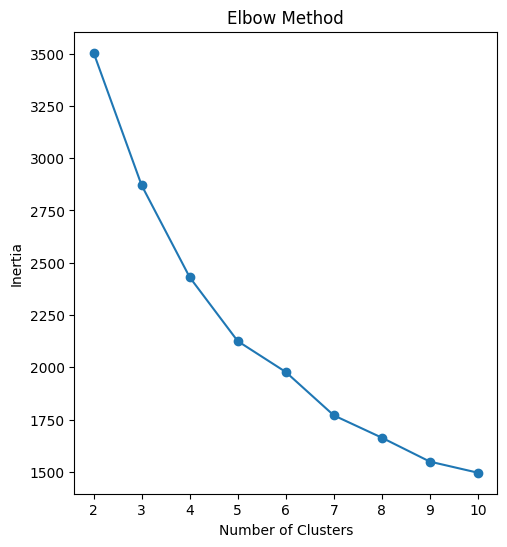

In [23]:
# Plot the Elbow Method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

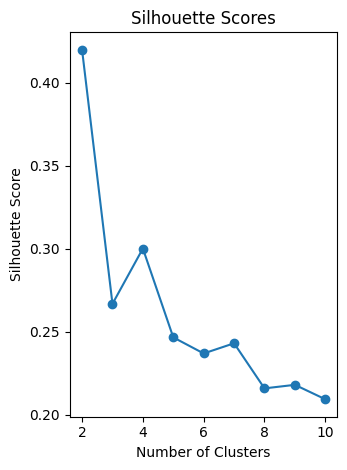

In [24]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [25]:
# Choose the optimal number of clusters (for example, from the plots)
optimal_k = 3  # Update this based on the Elbow or Silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_scaled)


KMeans(n_clusters=3, random_state=42)

Cluster Labels:

- kmeans.labels_: After fitting the model, this retrieves the cluster labels for each data point, **indicating which cluster each point belongs to(which cluster not which label)**.

In [26]:
# Assign cluster labels to the original data
data['Cluster'] = kmeans.labels_


##Visualization:
- plt.figure(figsize=(10, 6)): Sets the size of the plot.
- plt.scatter(): Plots the data points in a scatter plot.

- The **x-axis uses the first feature** (e.g., sepal length), and the **y-axis uses the second feature** (e.g., sepal width).
- Each cluster is plotted in a **different color**, with labels indicating which cluster is which.
-Centroid Visualization:
  - kmeans.cluster_centers_: **Retrieves the coordinates** of the cluster centers after fitting.

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  Cluster  
0        0.0  NBA001              6.3        0  
1        0.0  NBA021             12.8        2  
2        1.0  NBA013             20.9        2  
3        0.0  NBA009              6.3        1  
4        0.0  NBA008              7.2        2  


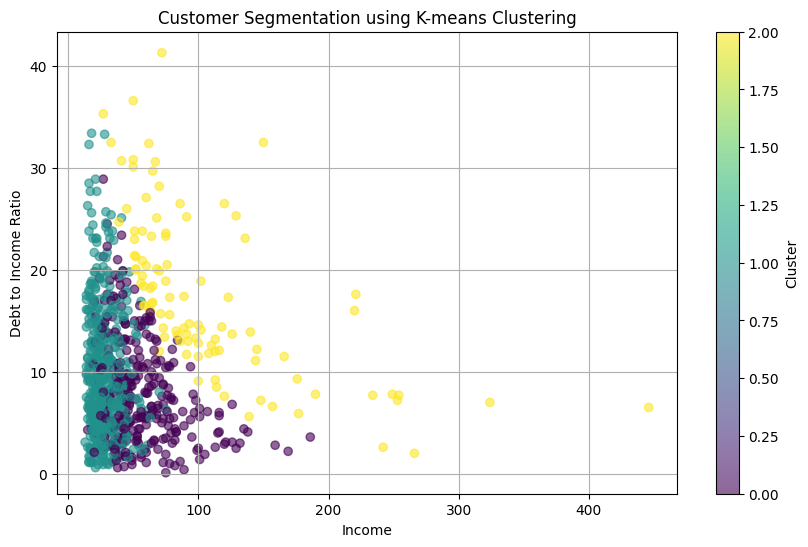

In [27]:
# Display the first few rows with cluster assignments
print(data.head())

# Visualize the clusters (2D projection for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(data['Income'], data['DebtIncomeRatio'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Income')
plt.ylabel('Debt to Income Ratio')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


---
##SAVE MODEL
- Purpose: Saving a trained machine learning model allows you to **reuse it without retraining**, which saves time and computational resources. It also **enables you to deploy** the model for use in applications.
- Using pickle:
    - **pickle** is a Python module for **serializing and deserializing Python objects**.

In [ ]:
import pickle

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Load the model from the file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


---
DEPLOYMENT
- Purpose: Deployment makes your model available for real-world applications, allowing **users to make predictions** based on **new input data**(unseen data).

Common Deployment Options:
- Web Applications:
        we can deploy your model using web frameworks like **Flask or FastAPI to create a REST API**.

## warning: don't run this below cell this wont work we need server to run this, colab wont allow to access its server. Its just for knowledge purpose.

In [ ]:
### warning: don't run this cell this wont work we need server to run this, colab wont allow to access its server.
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('kmeans_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'cluster': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
